In [1]:
import numpy as np
from matplotlib.pyplot import *
import basic
import prjlib
s = (180./np.pi)**2

In [2]:
pL0 = np.linspace(1,30,30)
pc0 = np.array([8,-2.5,0.0,2.0,0.,0.,0.8,0.0,-.3,-.1,-.1,-.1,0.5,0.1,-.1,0.0,-.2,0.4,0.4,1.0,0.0,0.0,0.1,0.3,0.0,0.2,0.3,0.0,0.5,0.0])*1e-2
pv0 = np.array([2,2.10,2.0,1.5,1.,1.,1.0,1.0,1.0,1.0,0.8,0.8,0.6,0.6,0.6,0.6,0.5,0.4,0.4,0.4,0.4,0.4,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.2])*1e-2
pL1 = np.linspace(50,750,14)
pc1 = np.array([0.01,0.11,0.05,-.01,0.02,-.01,0.12,0.02,0.06,-.04,0.05,0.06,0.00,-.17])*1e-2
pv1 = np.array([0.11,0.07,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.06,0.09,0.13])*1e-2

In [3]:
#PB
pbL = np.array([250,550,850,1150,1450,1750])
pbc = np.array([0.2,1.7,0.,.5,0.,-.9])*1e-4
pbv = np.array([0.5,.9,1.,1.,.8,.9])*1e-4

In [4]:
bkL = np.array([0.3595e2,0.1059e3,0.1757e3,0.2457e3,0.3156e3,0.3855e3,0.4554e3,0.5253e3,0.5952e3,0.6651e3])
bkc = np.array([-0.355,-0.594,-0.354,-0.69,-2.15,-1.43,1.64,-0.854,-1.47,1.77])*1e-7*s
bkv = np.array([0.986,0.74,0.869,1.414,1.54,1.15,0.975,1.12,1.19,1.33])*1e-7*s

In [5]:
def load_spectrum(bn,Lmin,Lsp=2048,doreal='False'):
    ps, __ = prjlib.filename_init(doreal=doreal,rlmin='200',dearot='True')
    sn = 100
    mb, mb0, mb1 = prjlib.binning_all(bn,lmin=Lmin,Lsp=2048)
    scl = s*np.array([np.loadtxt(ps.quad.f['EB'].cl[i],unpack=True)[1] for i in range(1,sn+1)])
    vcl = np.std(scl,axis=0)
    sci = prjlib.binning(scl,mb0,mb1)
    vcb = np.std(sci,axis=0)
    ocl = s*np.loadtxt(ps.quad.f['EB'].ocls,unpack=True)[1]
    ocb = prjlib.binning(ocl,mb0,mb1)
    return mb.bc, ocb, vcb, ocl, vcl

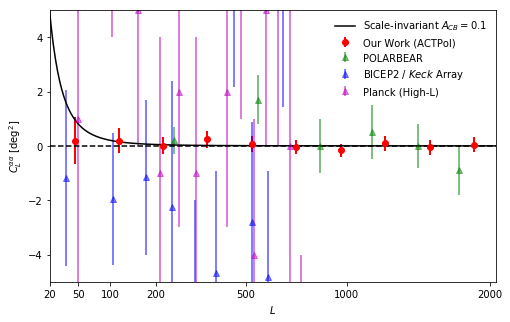

In [6]:
rcParams["figure.figsize"] = (8,5)
Lmin = 20
xlim(np.sqrt(Lmin),np.sqrt(2048))
ylim(-5.,5.)
xs = np.array([20,50,100,200,500,1000,2000])
xticks(np.sqrt(xs),xs)
xlabel('$L$')
ylabel(r'$C_L^{\alpha\alpha}$ [deg$^2$]')
a = 1e4
b, ocb, vcb, ocl, vcl = load_spectrum(10,Lmin,Lsp=2048,doreal='True')
errorbar(np.sqrt(b),a*ocb,yerr=a*vcb,fmt='o',label='Our Work (ACTPol)',color='r',lw=2)
errorbar(np.sqrt(pbL),a*pbc,yerr=a*pbv,fmt='^',label='POLARBEAR',color='g',alpha=0.5,lw=2)
errorbar(np.sqrt(bkL),a*bkc,yerr=a*bkv,fmt='^',label='BICEP2 / $Keck$ Array',color='b',alpha=0.5,lw=2)
#errorbar(pL0,a*pc0,yerr=a*pv0,fmt='^',label='Planck Low-L (read by eye)',color='c',alpha=0.5)
errorbar(np.sqrt(pL1),a*pc1,yerr=a*pv1,fmt='^',label='Planck (High-L)',color='m',alpha=0.5,lw=2)
x = np.arange(1,2048,1)
plot(np.sqrt(x),2.*np.pi/x/(x+1.)*a*.1*1e-4*s,label=r'Scale-invariant $A_{CB}=0.1$',color='k')
legend(loc=0,frameon=False)
axhline(0,ls='--',color='k')
savefig('fig_comparison.png')

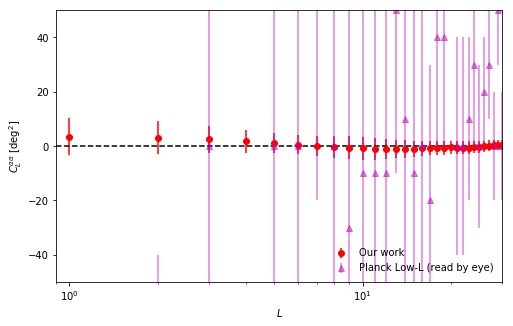

In [7]:
xlim(.9,30)
ylim(-50.,50.)
xscale('log')
xlabel('$L$')
ylabel(r'$C_L^{\alpha\alpha}$ [deg$^2$]')
a = 1e4
L = np.linspace(0,2048,2049)
errorbar(L,a*ocl,yerr=a*vcl,fmt='o',label='Our work',color='r')
errorbar(pL0,a*pc0,yerr=a*pv0,fmt='^',label='Planck Low-L (read by eye)',color='m',alpha=0.5)
#x = np.arange(1,2048,1)
#plot(x,2.*np.pi/x/(x+1.)*a*0.1e-4*s,label=r'Scale-invariant $A_{CB}=0.1$',color='k')
legend(loc=0,frameon=False)
axhline(0,ls='--',color='k')
savefig('fig_comparison_lowl.png')